In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [338]:
df= pd.read_csv('D:/Study/Nti/task3/Classified Data')

In [339]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
missing=df.isnull().sum()
print(missing)

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64


In [341]:
X = df.drop(['TARGET CLASS', 'Unnamed: 0'], axis=1)
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [342]:
param_grid = {'n_neighbors': range(1, 11)}  
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)  
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [343]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 6


In [344]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

In [345]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={best_k}: {accuracy:.2f}")

Accuracy with k=6: 0.95


In [346]:
print(confusion_matrix(y_test,y_pred))

[[138   4]
 [ 10 148]]


In [347]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       142
           1       0.97      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [348]:
k_values = range(1, 11)
accuracies = []

In [349]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

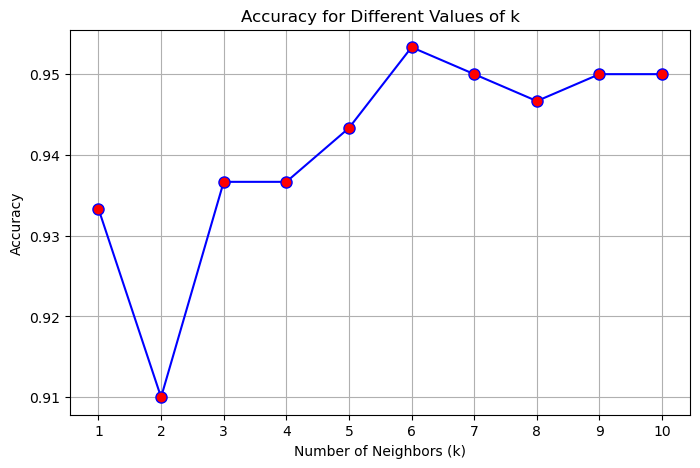

In [350]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.title('Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# SVM

In [351]:
df= pd.read_csv('D:/Study/Nti/task3/Heart Failure Clinical Records.csv')

In [352]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [353]:
missing=df.isnull().sum()
print(missing)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [354]:
scale=StandardScaler()
scale.fit(df.drop('DEATH_EVENT',axis=1))
df_scaled=scale.transform(df.drop('DEATH_EVENT',axis=1))
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[:-1])
df_scaled['DEATH_EVENT']=df['DEATH_EVENT']

In [355]:
X = df_scaled.drop('DEATH_EVENT', axis=1)
y = df_scaled['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [356]:
svm_model = SVC(kernel='poly', C=1.0, random_state=42,class_weight='balanced')
svm_model.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='poly', random_state=42)

In [357]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.2f}")

Accuracy of SVM: 0.85


In [358]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[39  6]
 [ 3 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.67      0.80      0.73        15

    accuracy                           0.85        60
   macro avg       0.80      0.83      0.81        60
weighted avg       0.86      0.85      0.85        60

